# PCA Analysis of Arbitrage opportunities

This notebook performs Principal Component Analysis (PCA) on Arbitrage opportunities from blockchain transaction data to identify patterns and reduce dimensionality. The workflow includes:

1. **Data Preprocessing**:
   - Load and modify the compressed array data.
   - Replace metadata with integer indices for easier processing.

2. **PCA Implementation**:
   - Perform PCA to extract principal components.
   - Analyze the explained variance ratio to determine the significance of each component.

3. **Visualization**:
   - Plot cumulative explained variance with a logarithmic x-axis.
   - Visualize the first principal component and its logarithmic transformation.
   - Perform FFT analysis on the first principal component.

4. **Opportunity Profit Analysis**:
   - Filter and sort transaction data based on opportunity profit and gas fees.
   - Visualize relationships between opportunity profit and transaction priority fees.

This analysis aims to uncover insights into gas distribution patterns and their impact on transaction profitability.

In [62]:
import numpy as np

# Load the compressed_array.npy file
compressed_array = np.load('compressed_array.npy', allow_pickle=True)

# Replace the 'transaction_blockNumber' column with integer indexes from 1 to the length of the column
compressed_array[0, 1:] = np.arange(1, compressed_array.shape[1])

# Initialize a list to store the names with their respective indices
name_indices = []

# Replace the name strings at the start of other columns with integer indexes
for idx in range(1, compressed_array.shape[0]):
    name = compressed_array[idx, 0]
    name_indices.append((idx - 1, name))  # Store the index and name
    compressed_array[idx, 0] = idx - 1  # Replace the name with the index

# Save the names with their respective indices to a separate list
np.save('name_indices.npy', name_indices)

# Save the modified array back to a file
np.save('modified_compressed_array.npy', compressed_array)

print("Modified array and name indices saved successfully.")

Modified array and name indices saved successfully.


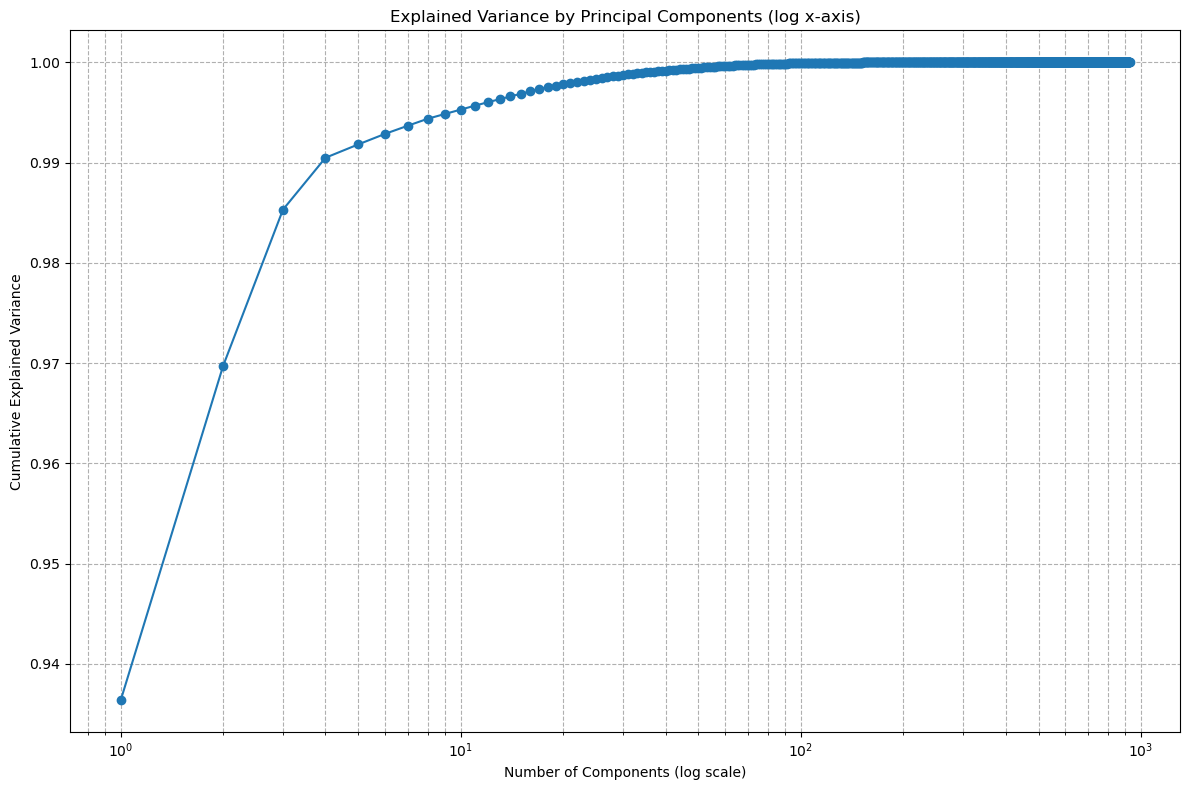

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the modified_compressed_array.npy file
compressed_array = np.load('modified_compressed_array.npy', allow_pickle=True)

# Extract all columns except the first column
data = compressed_array[1:, 1:].astype(float)

# Perform PCA
pca = PCA()
pca.fit(data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Prepare x values (component indices starting at 1)
x = np.arange(1, len(explained_variance_ratio) + 1)

# Cumulative explained variance
cum_explained = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance with log x-axis
plt.figure(figsize=(12, 8))
plt.plot(x, cum_explained, marker='o')
plt.xscale('log')
plt.xlabel('Number of Components (log scale)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components (log x-axis)')
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()

The results of the PCA show us that the variance of the data is largely 1 dimensional. 94% of the variance is attributed to the first principal component while 4 leading components cumulatively account for more than 99% of the variance. This suggests that the transaction makers creating the arbitrage opportunities could be coupled to a small number of external systems(e.g. activity on Binance e.t.c.) which then could be used to predict future arbitrage opportunities.    

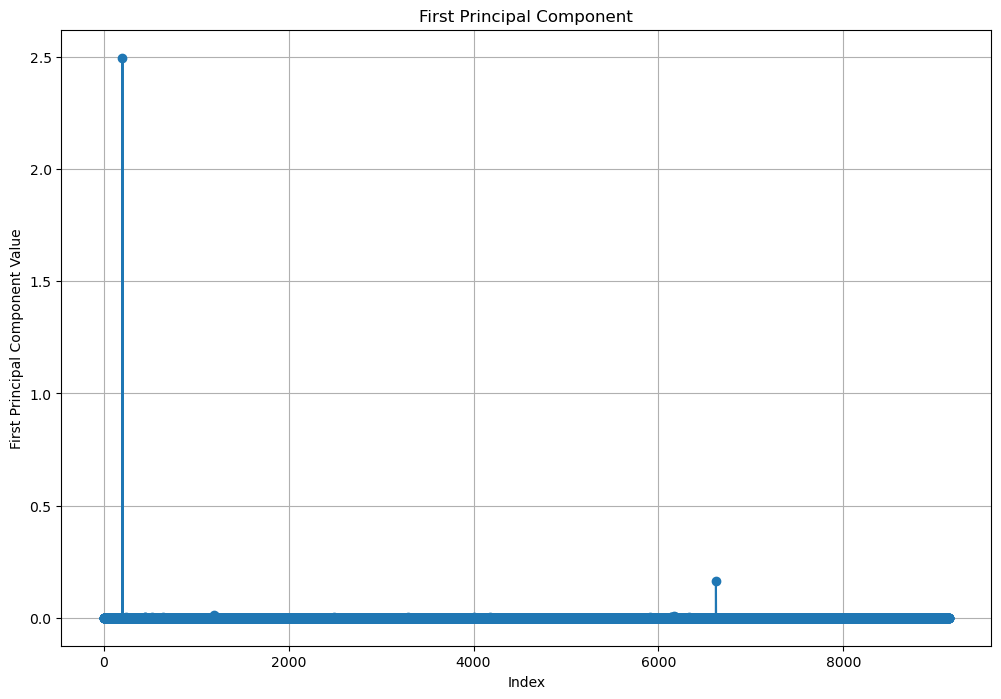

In [64]:
"""
PLOT FIRST PRINCIPAL COMPONENT (DOCUMENTATION)

This cell loads the preprocessed data from 'modified_compressed_array.npy',
transposes it, and computes the principal components using scikit-learn's PCA.
It then extracts and plots the first principal component.

Assumptions / Inputs:
- 'modified_compressed_array.npy' is a 2D numpy array where the first row
  and first column contain metadata/labels and the numeric data starts at [1:,1:].
- After transposition the data rows represent samples and columns represent features.

Steps performed:
1. Load the array from disk.
2. Transpose the array to orient samples/variables as expected.
3. Extract the numeric block `data = transposed_array[1:, 1:]` and cast to float.
4. Run PCA.fit_transform on `data` to obtain principal components.
5. Take the first principal component (largest variance direction) and plot it.

Outputs:
- Visual: line plot of the first principal component vs index.
- Variable: `first_principal_component` (1D numpy array) available in the kernel.

Notes / Tips:
- If your array already has samples as rows, the transpose may be unnecessary.
- If you want more components, inspect `pca.explained_variance_ratio_`.
- Use smoothing or reduce marker size for large datasets to improve readability.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the modified_compressed_array.npy file
compressed_array = np.load('modified_compressed_array.npy', allow_pickle=True)

# Transpose the compressed_array (adjust if your data is already in samples-as-rows format)
transposed_array = compressed_array.T

# Extract all rows except the first row and all columns except the first column
# (assumes first row/column are headers or indices)
data = transposed_array[1:, 1:].astype(float)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(data)

# Extract the first principal component
first_principal_component = principal_components[:, 0]

# Plot the first principal component
plt.figure(figsize=(12, 8))
plt.plot((first_principal_component), marker='o')
plt.xlabel('Index')
plt.ylabel('First Principal Component Value')
plt.title('First Principal Component')
#plt.ylim(0,0.05)
plt.grid(True)
plt.show()

C:\Users\abcgi\AppData\Local\Temp\ipykernel_31672\3863840953.py:10: RuntimeWarning: invalid value encountered in log
  log_components = np.log(non_zero_components)


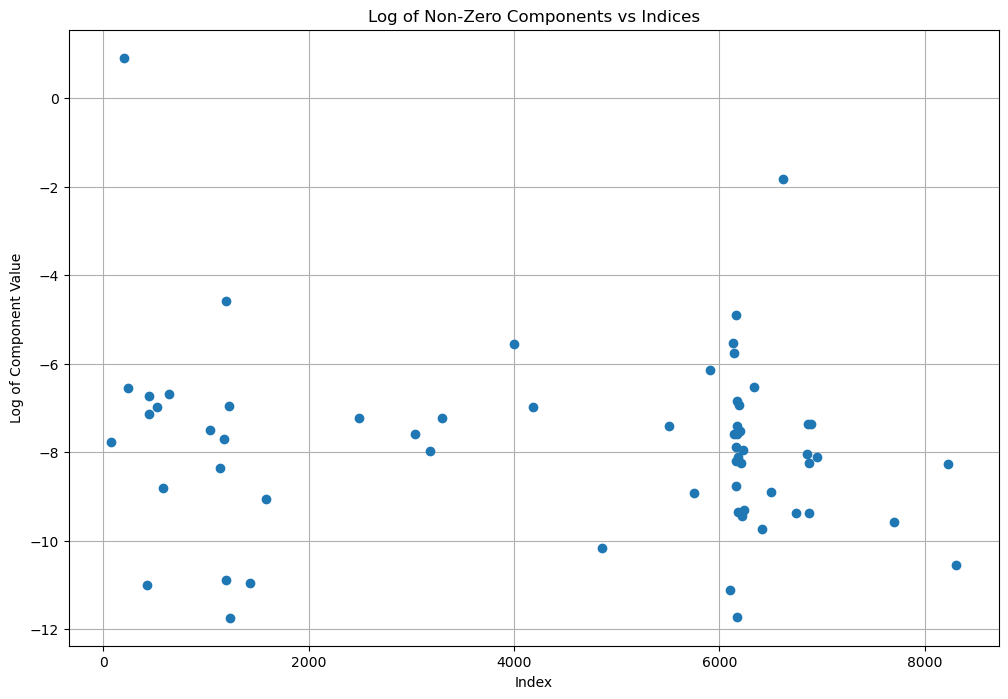

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming first_principal_component is your numpy array
# Extract the non-zero components
non_zero_indices = np.nonzero(first_principal_component)[0]
non_zero_components = first_principal_component[non_zero_indices]

# Calculate the logarithm of the non-zero components
log_components = np.log(non_zero_components)

# Plot the logarithm of the components versus their indices
plt.figure(figsize=(12, 8))
plt.plot(non_zero_indices, log_components, marker='o', linestyle='none')
plt.xlabel('Index')
plt.ylabel('Log of Component Value')
plt.title('Log of Non-Zero Components vs Indices')
plt.grid(True)
plt.show()

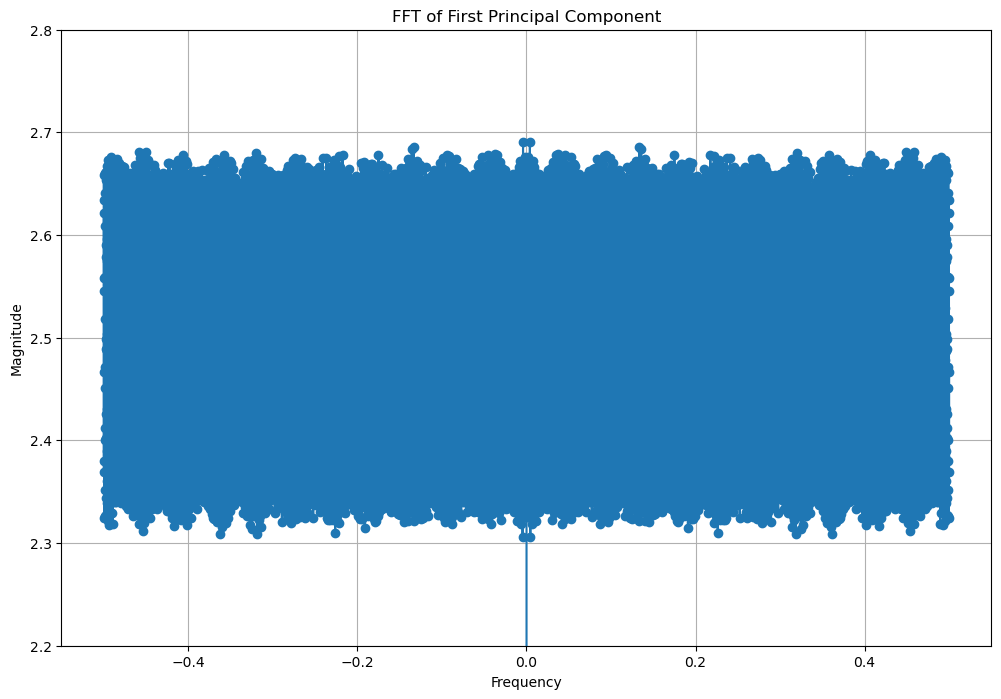

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

fft_result = np.fft.fft(first_principal_component)

# Calculate the frequencies corresponding to the FFT result
frequencies = np.fft.fftfreq(len(first_principal_component))

# Plot the magnitude of the FFT
plt.figure(figsize=(12, 8))
plt.plot(frequencies, np.abs(fft_result), marker='o')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.ylim(2.2,2.8)
plt.title('FFT of First Principal Component')
plt.grid(True)
plt.show()

In [67]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv(R"C:\Users\abcgi\Arbitrage\aggregated_transaction_hash2.csv")

# Filter the rows to include only positive 'opportunity_profit' values
filtered_df = df[df['opportunity_profit'] > 0]

# Create a numpy array with the filtered values
result_array = filtered_df[['opportunity_profit', 'transaction_priorityFeePerGas']].to_numpy()

# Sort the numpy array by the second column (transaction_priorityFeePerGas)
sorted_array = result_array[result_array[:, 1].argsort()]

# Save the sorted array to a file (optional)
np.save('sorted_array.npy', sorted_array)

print("Sorted array created successfully.")
print(sorted_array)

Sorted array created successfully.
[[3.53260489e-05 1.00000000e+00]
 [1.13039612e-06 1.00000000e+00]
 [1.01392503e-06 1.00000000e+00]
 ...
 [6.41575549e-04 2.49786629e+11]
 [1.79614836e-02 2.56312198e+11]
 [2.60382648e-02 2.68487384e+11]]


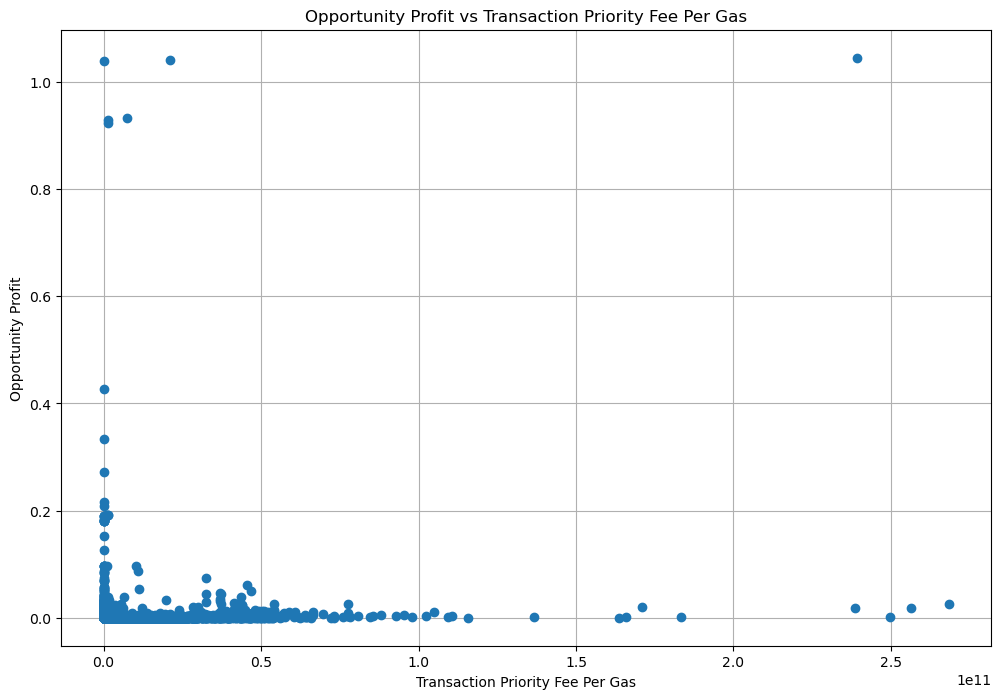

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot the sorted array
plt.figure(figsize=(12, 8))
plt.plot(sorted_array[:, 1], sorted_array[:, 0], marker='o', linestyle='none')
plt.xlabel('Transaction Priority Fee Per Gas')
plt.ylabel('Opportunity Profit')
plt.title('Opportunity Profit vs Transaction Priority Fee Per Gas')
plt.grid(True)
plt.show()

In [69]:
np.save('profit_gas.npy', sorted_array)

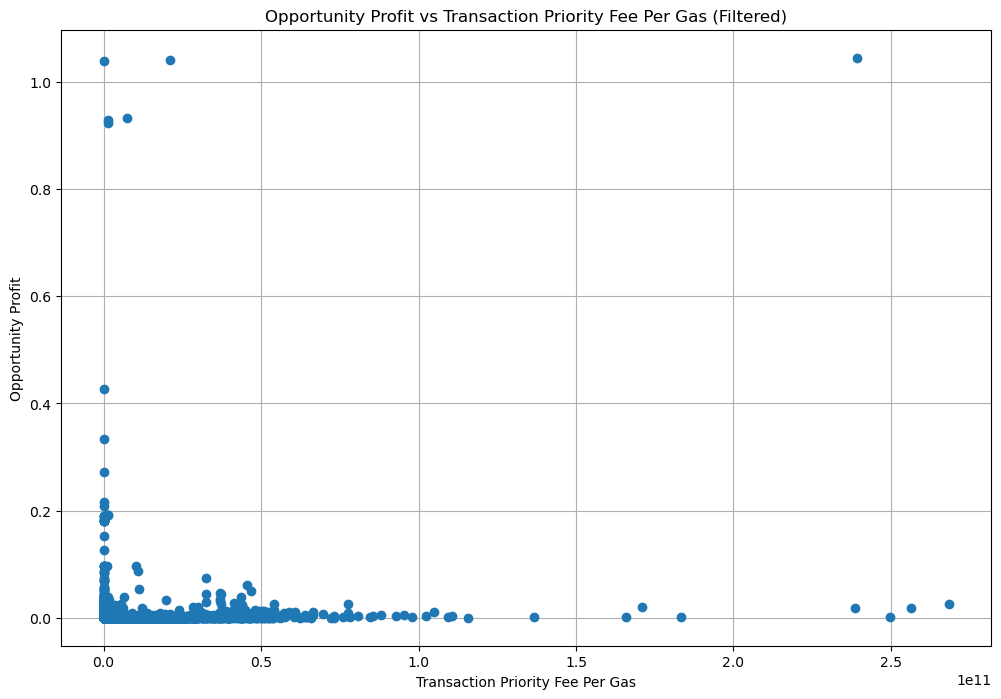

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter the sorted array to exclude values of the first column lower than 0.001
filtered_sorted_array = sorted_array[sorted_array[:, 0] >= 0.00001]

# Plot the filtered sorted array
plt.figure(figsize=(12, 8))
plt.plot(filtered_sorted_array[:, 1], (filtered_sorted_array[:, 0]), marker='o', linestyle='none')
plt.xlabel('Transaction Priority Fee Per Gas')
plt.ylabel('Opportunity Profit')
plt.title('Opportunity Profit vs Transaction Priority Fee Per Gas (Filtered)')
plt.grid(True)
plt.show()

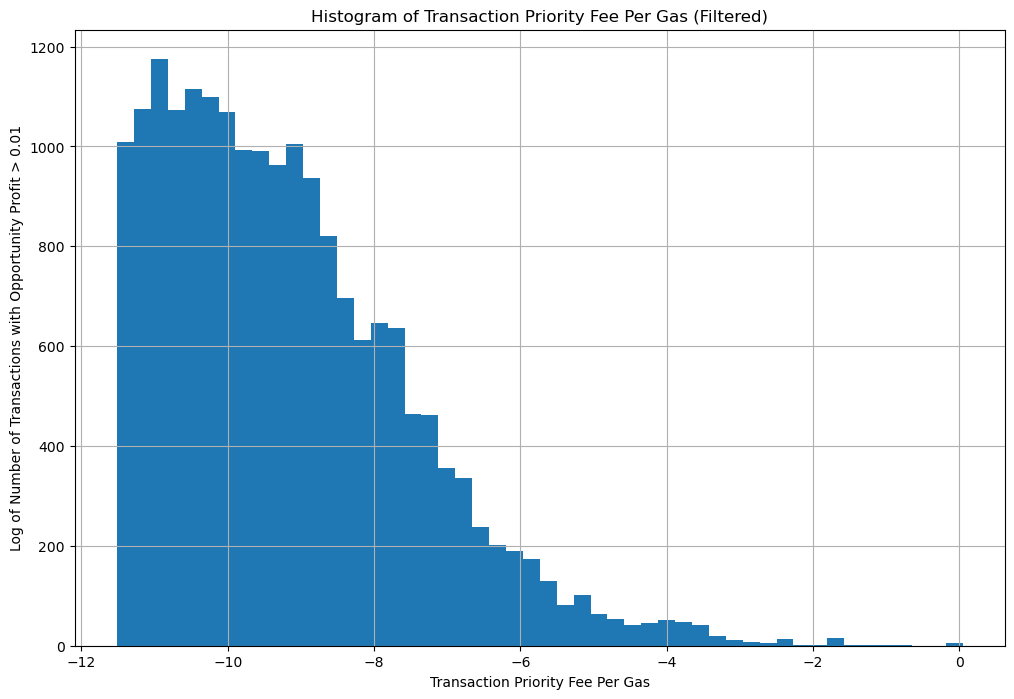

In [71]:
plt.figure(figsize=(12, 8))
plt.hist(np.log(filtered_sorted_array[:, 0]), bins=50)
plt.xlabel('Transaction Priority Fee Per Gas')
plt.ylabel('Log of Number of Transactions with Opportunity Profit > 0.01')
plt.title('Histogram of Transaction Priority Fee Per Gas (Filtered)')
plt.grid(True)
plt.show()

In [72]:
import numpy as np

# Assuming sorted_array is your numpy array
# Save the sorted_array to a .csv file
np.savetxt('sorted_arraycsv.csv', sorted_array, delimiter=',', header='opportunity_profit,transaction_priorityFeePerGas', comments='')

print("Numpy array saved to 'sorted_array.csv' successfully.")

Numpy array saved to 'sorted_array.csv' successfully.


Summed per gas array sorted successfully.
[[1.00000000e+00 2.30175503e-02]
 [2.00000000e+00 2.70067501e-03]
 [3.00000000e+00 2.93123627e-05]
 ...
 [2.49786629e+11 6.41575549e-04]
 [2.56312198e+11 1.79614836e-02]
 [2.68487384e+11 2.60382648e-02]]


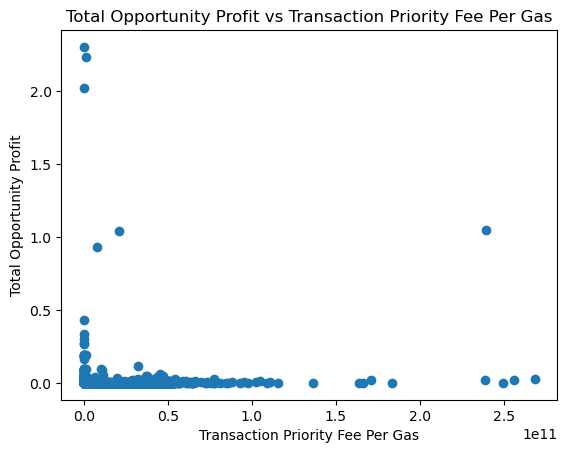

In [73]:
import numpy as np

# Assuming sorted_array is your numpy array
# Extract the unique values of the second column (transaction_priorityFeePerGas)
unique_gas_values = np.unique(sorted_array[:, 1])

# Initialize an empty list to store the summed values
summed_values = []

# Iterate over each unique gas value
for gas_value in unique_gas_values:
    # Sum the respective first column values (opportunity_profit) for the current gas value
    sum_profit = sorted_array[sorted_array[:, 1] == gas_value, 0].sum()
    # Append the gas value and the summed profit to the list
    summed_values.append([gas_value, sum_profit])

# Convert the list to a numpy array
summed_pergas = np.array(summed_values)

# Sort the summed_pergas array by the gas values (first column)
sorted_summed_pergas = summed_pergas[summed_pergas[:, 0].argsort()]

print("Summed per gas array sorted successfully.")
print(sorted_summed_pergas)

plt.scatter(sorted_summed_pergas[:, 0], summed_pergas[:, 1], marker='o')
plt.xlabel('Transaction Priority Fee Per Gas')
plt.ylabel('Total Opportunity Profit')
plt.title('Total Opportunity Profit vs Transaction Priority Fee Per Gas')   
plt.show()

In [74]:
import numpy as np

# Assuming sorted_array is your numpy array
# Save the sorted_array to a .csv file
np.savetxt(' summed_pergas.csv', sorted_summed_pergas, delimiter=',', header='transaction_priorityFeePerGas, opportunity_profit', comments='')

print("Numpy array saved to 'summed_pergas.csv' successfully.")

Numpy array saved to 'summed_pergas.csv' successfully.


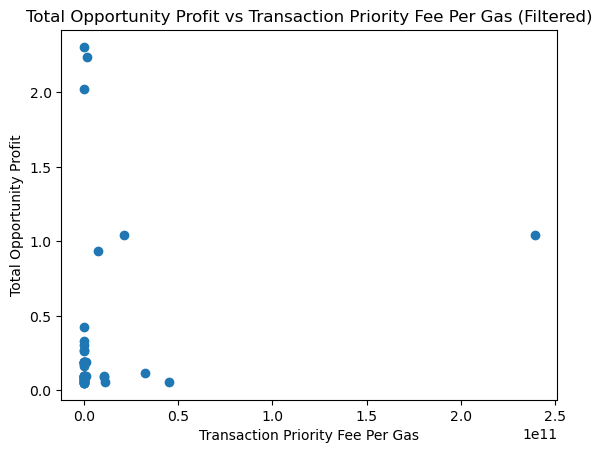

In [75]:
plt.scatter(filtered_summed_pergas[:, 0], filtered_summed_pergas[:, 1], marker='o')
plt.xlabel('Transaction Priority Fee Per Gas')
plt.ylabel('Total Opportunity Profit')
plt.title('Total Opportunity Profit vs Transaction Priority Fee Per Gas (Filtered)')
plt.show()  

In [76]:
import numpy as np

# Load the numpy array from the file
profit_gas = np.load('profit_gas.npy', allow_pickle=True)

print("Numpy array loaded successfully.")
print(profit_gas)

Numpy array loaded successfully.
[[3.53260489e-05 1.00000000e+00]
 [1.13039612e-06 1.00000000e+00]
 [1.01392503e-06 1.00000000e+00]
 ...
 [6.41575549e-04 2.49786629e+11]
 [1.79614836e-02 2.56312198e+11]
 [2.60382648e-02 2.68487384e+11]]


In [77]:
import numpy as np

# Load the numpy array from the file
profit_gas = np.load('profit_gas.npy', allow_pickle=True)

# Extract the first column
first_column = profit_gas[:, 0]

# Create intervals from 0 to 3 with a step of 0.01
intervals = np.arange(0, 1.51, 0.05)

# Initialize an array to store the sums
sums = np.zeros(len(intervals) - 1)

# Sum the numbers in the first column for each interval
for i in range(len(intervals) - 1):
    sums[i] = first_column[(first_column >= intervals[i]) & (first_column < intervals[i + 1])].sum()

# Save the sums in a separate array
np.save('sums.npy', sums)

print("Sums array created and saved successfully.")
print(sums)

Sums array created and saved successfully.
[12.43125975  2.16462286  0.1261557   2.94780782  0.4239987   0.27168802
  0.33320132  0.          0.4276047   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  2.78442183  0.          3.12462229  0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


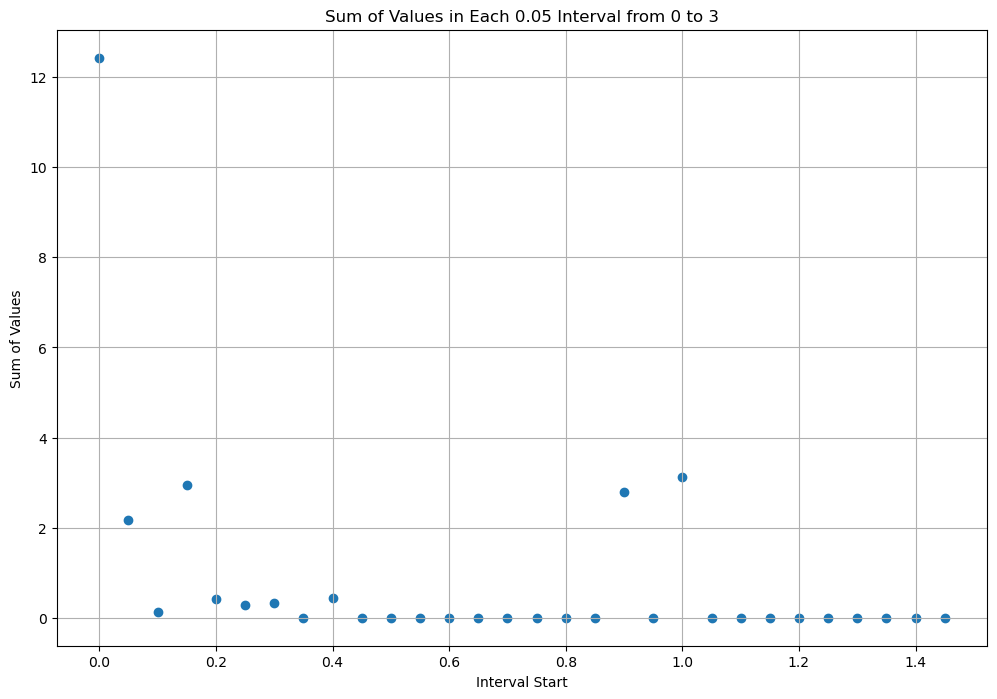

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sums array from the file
sums = np.load('sums.npy')

# Create intervals from 0 to 3 with a step of 0.01
intervals = np.arange(0, 1.50, 0.05)

# Plot the sums array
plt.figure(figsize=(12, 8))
plt.scatter(intervals, sums, marker='o')
plt.xlabel('Interval Start')
plt.ylabel('Sum of Values')
plt.title('Sum of Values in Each 0.05 Interval from 0 to 3')
plt.grid(True)
plt.show()

In [79]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('aggregated_transaction_hash2.csv')

# Print the first value of the 'transaction_createdAt' column
first_value = df['transaction_createdAt'].iloc[0]
print("First value of 'transaction_createdAt':", first_value)

# Print the last value of the 'transaction_createdAt' column
last_value = df['transaction_createdAt'].iloc[-1]
print("Last value of 'transaction_createdAt':", last_value)

First value of 'transaction_createdAt': 2024-11-17 19:01:57
Last value of 'transaction_createdAt': 2024-11-25 04:12:13
